## Clustering Algorithms

### K-Means clustering 

In this notebook, we will implement k-means algorithm using sklearn.

In [1]:
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import warnings 
warnings.filterwarnings('ignore')

### Clustering of digits
We will use digit dataset for clustering, which is loaded through the load_digits API.

It loads `8x8` digit images with approximately `180 samples per class`.

From `10 classes`, it has `total of 1797 images`.

Each pixel has value between `0 and 16`.

In [2]:
digits = load_digits()


In [3]:
data = np.column_stack((digits.data, digits.target))
columns = np.append(digits.feature_names, ['targets'])

df_digits = pd.DataFrame(data, columns=columns)

In [4]:
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,targets
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [9]:
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,targets
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


### Some of the important parameters of KMeans are as follows :

You can watch @https://www.youtube.com/watch?v=4b5d3muPQmA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=41 for reference !

Since KMeans algorithm is susceptible to local minima, we perform multiple KMeans fit and select the ones with the lowest value of sum of squared error.

**n_clusters** (int):
- *Represents*: The `number of clusters (K)` you want to create.
- *Function*: Specifies the number of centroids to initialize.
- *Possible Input Values*: Any positive integer.

**init** (`string`, `k-means++`, `random`, or an ndarray):
- *Represents*: The method used to initialize cluster centroids.
- *Function*: Determines how the initial cluster centroids are placed.
- *Possible Input Values*:
  - `k-means++` (default): Smart initialization that tends to improve the convergence.
  - `random`: Randomly selects initial centroids from data points.
  - `An ndarray`: You can provide your own initial centroids.

**n_init** (int):
- *Represents*: The number of times the algorithm will be run with different centroid seeds.Basically it represents the number of times different centroids will be chosen for each iteration.
- *Function*: Helps mitigate the influence of random initialization on the final results.
- *Possible Input Values*: Any positive integer.

**max_iter** (int):
- *Represents*: The maximum number of iterations for the K-Means algorithm in a single run.
- *Function*: Specifies when to stop the algorithm if convergence is not achieved.
- *Possible Input Values*: Any positive integer.

**tol** (float):
- *Represents*: The tolerance to declare convergence.
- *Function*: Defines the threshold for centroid updates; if the change is smaller than this value, the algorithm stops.
- *Possible Input Values*: Any non-negative float.

**algorithm** (string, `auto`, `full`, `elkan`):
- *Represents*: The algorithm used for cluster assignment and centroid computation.
- *Function*: Different algorithms can be more efficient for specific scenarios.
- *Possible Input Values*:
  - `auto`: Automatically selects the best algorithm based on the dataset size and number of clusters.
  - `full`: Regular K-Means algorithm.
  - `elkan`: More efficient K-Means variant, especially for dense data.

**random_state** (int or RandomState instance):
- *Represents*: Seed for random number generation.
- *Function*: Controls the randomness of centroid initialization and the algorithm's behavior.
- *Possible Input Values*: Any integer or RandomState instance.


In [11]:
# Define K-means clustering object in dict object

kmeans_kwargs = {
    'init': 'random',
    'n_init': 50,
    'max_iter': 500,
    'random_state': 0
}

### Model Building

Let's define a pipeline with two stages :

preprocessing for feature scaling with MinMaxScaler.

clustering with KMeans clustering algorithm.

In [12]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('clustering', KMeans(n_clusters=10, **kmeans_kwargs))])

pipeline.fit(digits.data)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centers_` member variable of `KMeans class`

In [13]:
cluster_centers = pipeline[-1].cluster_centers_
cluster_centers.shape

(10, 64)

#### Dispalying the cluster centroids.

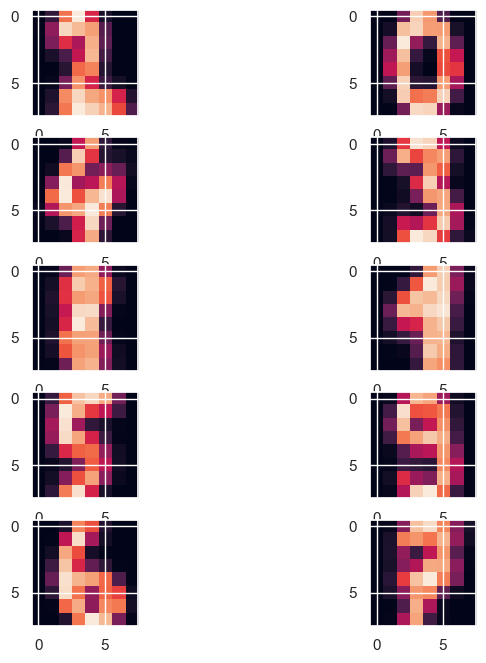

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(8,8))
for i, j in zip(ax.flat, cluster_centers.reshape(10, 8, 8)):
    i.imshow(j)

## In this case, the number of clusters were known, hence we set k=10 and got the clusters.

> **For deciding the optimal number of clusters through elbow and silhouette, we will pretend that we do not know the clusters in the data and we will try to discover the optimal number of clusters through these two methods one by one:**

    
## Elbow method

Here we keep track of sum-of-squared error (SSE) in a list for each value of k.

In [16]:
sse_digit = []
scaled_digits = MinMaxScaler().fit_transform(digits.data)

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

Note that the `sum of squared error` for a given clustering output is obtained through `inertia_`

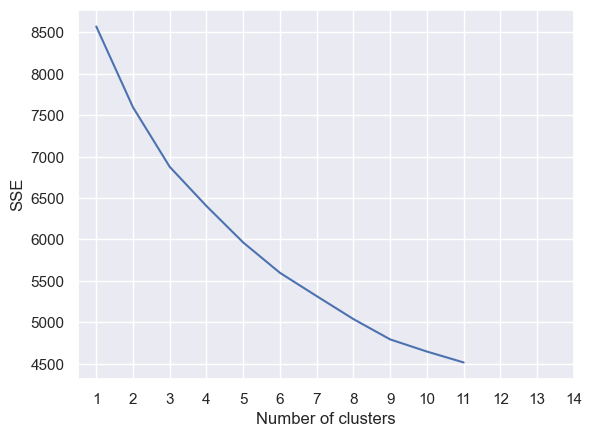

In [17]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 15))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

> There is a slight elbow at k=9, which could point to the fact that a few digits may have been merged in one cluster.

### Silhoutte Score

In [18]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

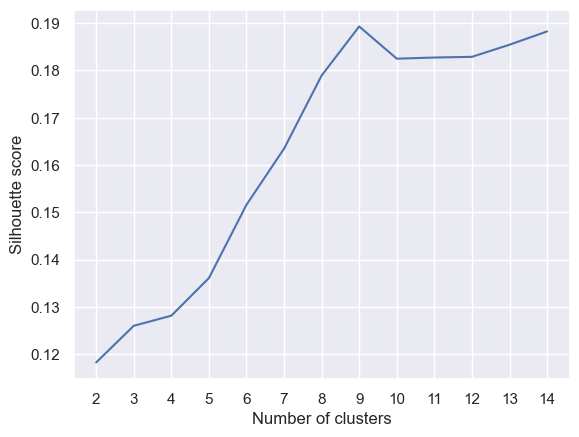

In [19]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

In [20]:
# Get the value of K for which the Silhouette coefficient is the highest.
# 2 is added since iteration is starting at 2.
print(np.argmax(sil_coef_digits) + 2) 

9


**Here as well, the optimal choice seems to be 9**

## Hierarchical Agglomerative Clustering (HAC) Algorithm.


Clustering is concerned about grouping objects with *similar attributes* or *characteristics*.  The objects in the same cluster are closer to one another than the objects from the other clusters.



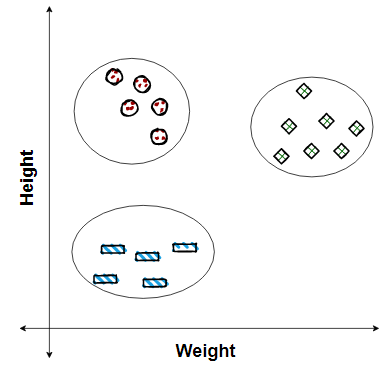

- In the image above, the clusters with same colour share similar properties (feature values represented on axis). For instance, if the x-axis represents weight and y-axis represent height, then the red cluster represents people with low BMI. Similar interpretations can be drawn for the remaining clusters.

- Hierarchial clustering starts by considering each data point as a cluster and then combines closest clusters to form larger clusters. `This is bottoms up approach`.

- There is an alternate approach, which is `top-down approach`, where the entire data is considered as a one single cluster, which is divided to form smaller clusters in each step.

### `Metric`

Certain metrics are used for calculating similarity between clusters.  Note that metric is a generalization of concept of distance. The metrics follow certain properties like

- (i) non-negative

- (ii) sysmetric

- (iii) follows triangle inequality



Some of the popular metric function are:


1.   **Euclidean** - 

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   \sqrt[]{\sum_{l=1}^{m} (\mathbf{x}_l^{(i)}-\mathbf{x}_l^{(j)})^2} $
 
2.   **Manhattan** -

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   {\sum_{l=1}^{m} \vert(\mathbf{x}_l^{(i)}-\mathbf{x}_l^{(j)})}\vert $

3.   **Cosine distance** -

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   1 - \frac{\mathbf{x}^{(i)} . \mathbf{x}^{(j)}} {||\mathbf{x}^{(i)}|| \ ||\mathbf{x}^{(j)}||}  = 1-cos(\theta) $



### Linkage

Linkage is a strategy for aggregating clusters.

There are four linkages that we will study
* Single linkage
* Average linkage
* Complete linkage
* Ward's linkage

The **Single linkage** criterion merges
clusters based on the shortest distance over all possible pairs. That is


> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \min_{i,j} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$










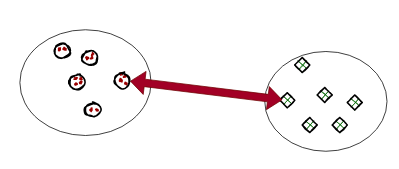

The **complete linkage** merges clusters to minimize the maximum distance between the clusters (in other words, the distance of the furthest elements).

$ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \max_{i,j} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$

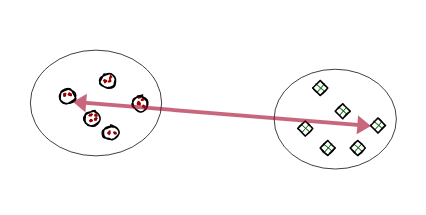

The **average linkage** criterion uses average distance over all possible pairs between the groups for merging clusters

> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) = \frac{1}{|r_1| |r_2|} \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$

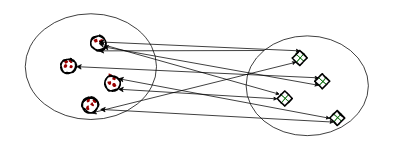

**Ward's linkage**

This computes the sum of squared distances within the clusters.
> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} ||\mathbf{x}_{r_1}^{(i)} - \mathbf{x}_{r_2}^{(j)} ||^2$

## Hierarchical Agglomerative Clustering

Algorithm:

1. Calculate the distance matrix between pairs of clusters.

2. while all the objets are clustered into one.
   * Detect the two closest groups (clusters) and merge them.

### Dendrogram

Dendrograms are a graphical representation of the agglomerative process which show a how aggregation happens at each level. Lets take example of a toy dataset to understand this.

Using a toy-dataset to demostrate the working of HAC
Example:
|   x1   |   x2   |
|-------|-------|
|   8   |   3   |
|   5   |   3   |
|   6   |   4   |
|   1   |   6   |
|   2   |   8   |


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

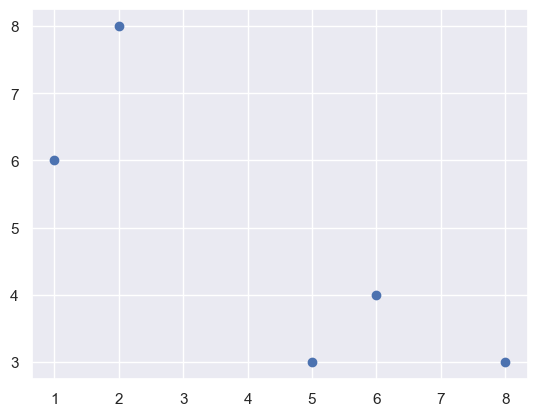

In [23]:
X = np.array([(8,3),(5,3),(6,4),(1,6),(2,8)])
scaled_X = normalize(X)
plt.scatter(X[:,0],X[:,1])
plt.show()

#### Let's plot the dendrogram with `scipy.cluster.hierarchy` library.

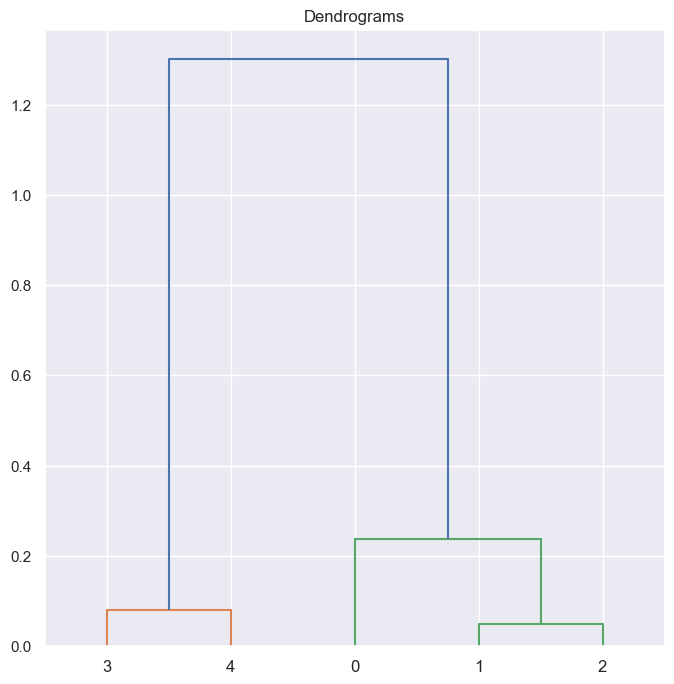

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

## HAC is implemented in `sklearn.cluster` module as `AgglomerativeClustering` class.